# Question 1

## (a)

In [1]:
# Given probabilities
P_positive_given_M = 0.95  # P[+|M]
P_negative_given_not_M = 0.95  # P[-|not M]
P_M = 0.01  # P[M]

In [2]:
# Calculating the required probabilities using the complements
P_negative_given_M = 1 - P_positive_given_M  # P[-|M]
P_positive_given_not_M = 1 - P_negative_given_not_M  # P[+|not M]
P_not_M = 1 - P_M  # P[not M]

print(f"P[-|M] (Probability of a false negative): ", P_negative_given_M)
print(f"P[+|not M] (Probability of a false positive): ", P_positive_given_not_M)
print(f"p[not M] (Probability that a person does not have the marker): ", P_not_M)

P[-|M] (Probability of a false negative):  0.050000000000000044
P[+|not M] (Probability of a false positive):  0.050000000000000044
p[not M] (Probability that a person does not have the marker):  0.99


## (b)

In [3]:
# Calculate the total probability of testing positive P[+] = P[+∣M]×P[M] + P[+∣not M]×P[not M]
P_positive = (P_positive_given_M * P_M) + (P_positive_given_not_M * P_not_M)

# Apply Bayes' Theorem to find the posterior probability
P_M_given_positive = (P_positive_given_M * P_M) / P_positive

print(f"P[M|+] (Probability that a person test positive actually has the marker): ", P_M_given_positive)

P[M|+] (Probability that a person test positive actually has the marker):  0.16101694915254225


#### Answer: The chance that a randomly selected person who tests positive for the marker actually has the marker is approximately 16.1%.
* While a 16.1% chance is not negligible, it is also not definitive. This result is largely due to the low prior probability of having the marker (P[M]= 0.01). Despite the high accuracy of the test, because the marker is rare in the general population, most positive test results will be false positives. This is a feature of the data known as the base rate fallacy or prior probability fallacy, where the prior probability significantly affects the posterior probability.
* This emphasizes the importance of considering the prevalence of the condition in the population when interpreting medical test results; a low prevalence can lead to a high number of false positives even with a test that has a high accuracy.

In [4]:
# Update the prior probability of having the marker
P_M_updated = 0.10
P_not_M_updated = 1 - P_M_updated

# Recalculate the total probability of testing positive with the updated prior probability
P_positive_updated = (P_positive_given_M * P_M_updated) + (P_positive_given_not_M * P_not_M_updated)

# Apply Bayes' Theorem with the updated probability
P_M_given_positive_updated = (P_positive_given_M * P_M_updated) / P_positive_updated

print(f"P[M|+] (Probability that a person test positive actually has the marker): ", P_M_given_positive_updated)

P[M|+] (Probability that a person test positive actually has the marker):  0.6785714285714284


#### Answer: With the frequency of the marker increased by a factor of 10, i.e., P[M]=0.10, the chance that a randomly selected individual from this group who tests positive actually has the marker is approximately 67.9%.
* This substantial increase from the previous probability of 16.1% reflects the impact of the prior probability P[M] on the test's predictive value. When the condition being tested for is more common, the positive predictive value of the test increases significantly. This illustrates how the prevalence of a condition in the population can drastically alter the interpretation of a diagnostic test's results.

# Question 2

## (a)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Note: you can modify the template, define new attributes or functions as you want
class NaiveBayesClassifier():
    def __init__(self):
        # classes
        self.cls = []
        # statistics of features that belongs to different classes
        self.cls_stats = []
        # prior probablity, i.e. P(C)
        self.prior_prob = []
        
        self.trained = False
    
    @staticmethod
    def gaussian(X, mean, std):
        """
        Gaussain probability distribution function
        
        Parameters
        ----------
        X: numpy.ndarray
            Input data, shape (n_samples, n_features)
        mean: numpy.ndarray
            Average of each feature, shape (n_features,)
        std: numpy.ndarray
            Standard deviation of each feature, shape (n_features,)
            
        Returns
        -------
        prob: numpy.ndarray
            Probability of each feature, shape (n_samples, n_features)
        """
        prob = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-(((X - mean) ** 2) / (2 * std ** 2)))
        return prob
    
    @staticmethod
    def calculate_statistics(X):
        """
        Calculate the average and standard deviation of each feature based on the input data
        
        Parameters
        ----------
        X: numpy.ndarray
            Input data, shape (n_samples, n_features)
            
        Returns
        -------
        mean: numpy.ndarray
            Average of each feature, shape (n_features,)
        std: numpy.ndarray
            Standard deviation of each feature, shape (n_features,)
        """
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        return mean, std
    
    @staticmethod
    def calculate_prob(X, mean, std):
        """
        Calculate the prior probability that the input features belong to a specific class,
        i.e. P(X | C) = \prod_i P(X_i | C)
        which is defined by the statistics of features in that class.
        
        Gaussain probability distribution function
        
        Parameters
        ----------
        X: numpy.ndarray
            Input data, shape (n_samples, n_features)
        mean: numpy.ndarray
            Average of each feature in the speific class, shape (n_features,)
        std: numpy.ndarray
            Standard deviation of each feature in the specific class, shape (n_features,)
            
        Returns
        -------
        prob: numpy.ndarray
            Probability that the features belong to a spcefic class, shape (n_samples,)
        """
        product_prob = NaiveBayesClassifier.gaussian(X, mean, std)
        return np.prod(product_prob, axis=1)
    
    def fit(self, X, y):
        """
        Train the classifier by calculating the statistics of different features in each class
        
        Parameters
        ----------
        X: numpy.ndarray
            Input data, shape (n_samples, n_features)
        y: numpy.ndarray
            Labels (the actual classes), shape (n_samples)
        """
        ndata = y.shape[0] # the number of labels
        self.cls = np.unique(y) # eliminate the same classes output the actual number of labels
        for i in range(len(self.cls)):
            cls_filter = (y == self.cls[i])
            X_cls = X[cls_filter]
            mean, std = self.calculate_statistics(X_cls)
            self.prior_prob.append(cls_filter.sum() / ndata)
            self.cls_stats.append((mean, std))
        self.trained = True
            
    def predict(self, X):
        # Do the prediction by outputing the class that has highest probability
        assert self.trained, f"The classfier has not been trained. Call {self.__class__.__name__}.fit first"
        probs = []
        for i in range(len(self.cls)):
            mean, std = self.cls_stats[i]
            prob = self.calculate_prob(X, mean, std) * self.prior_prob[i]
            probs.append(prob)
        probs = np.array(probs).T  # Each row contains the probs for each class
        return self.cls[np.argmax(probs, axis=1)]


In [7]:
# Load the wine dataset
wines_df = pd.read_csv("../C242-Homework/Datasets/wines.csv")

# Display the first few rows of the dataframe
wines_df.head()

Alcohol %  Malic Acid   Ash  Alkalinity   Mg  Phenols  Flavanoids  \
0      14.23        1.71  2.43        15.6  127      2.8        3.06   
1      13.24        2.59  2.87        21.0  118      2.8        2.69   
2      14.83        1.64  2.17        14.0   97      2.8        2.98   
3      14.12        1.48  2.32        16.8   95      2.2        2.43   
4      13.75        1.73  2.41        16.0   89      2.6        2.76   

   Phenols.1  Proantho-cyanins  Color intensity   Hue  OD280 315  Proline  \
0       0.28              2.29             5.64  1.04       3.92     1065   
1       0.39              1.82             4.32  1.04       2.93      735   
2       0.29              1.98             5.20  1.08       2.85     1045   
3       0.26              1.57             5.00  1.17       2.82     1280   
4       0.29              1.81             5.60  1.15       2.90     1320   

   Start assignment  ranking  
0                 1        1  
1                 1        1  
2                 1        1  
3                 1        1  
4                 1        1

In [8]:
# 'Start assignment' is the cultivar label
X = wines_df.iloc[:, :-2].values
y = wines_df['ranking'].values

/Users/jesslin/anaconda3/envs/c142/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


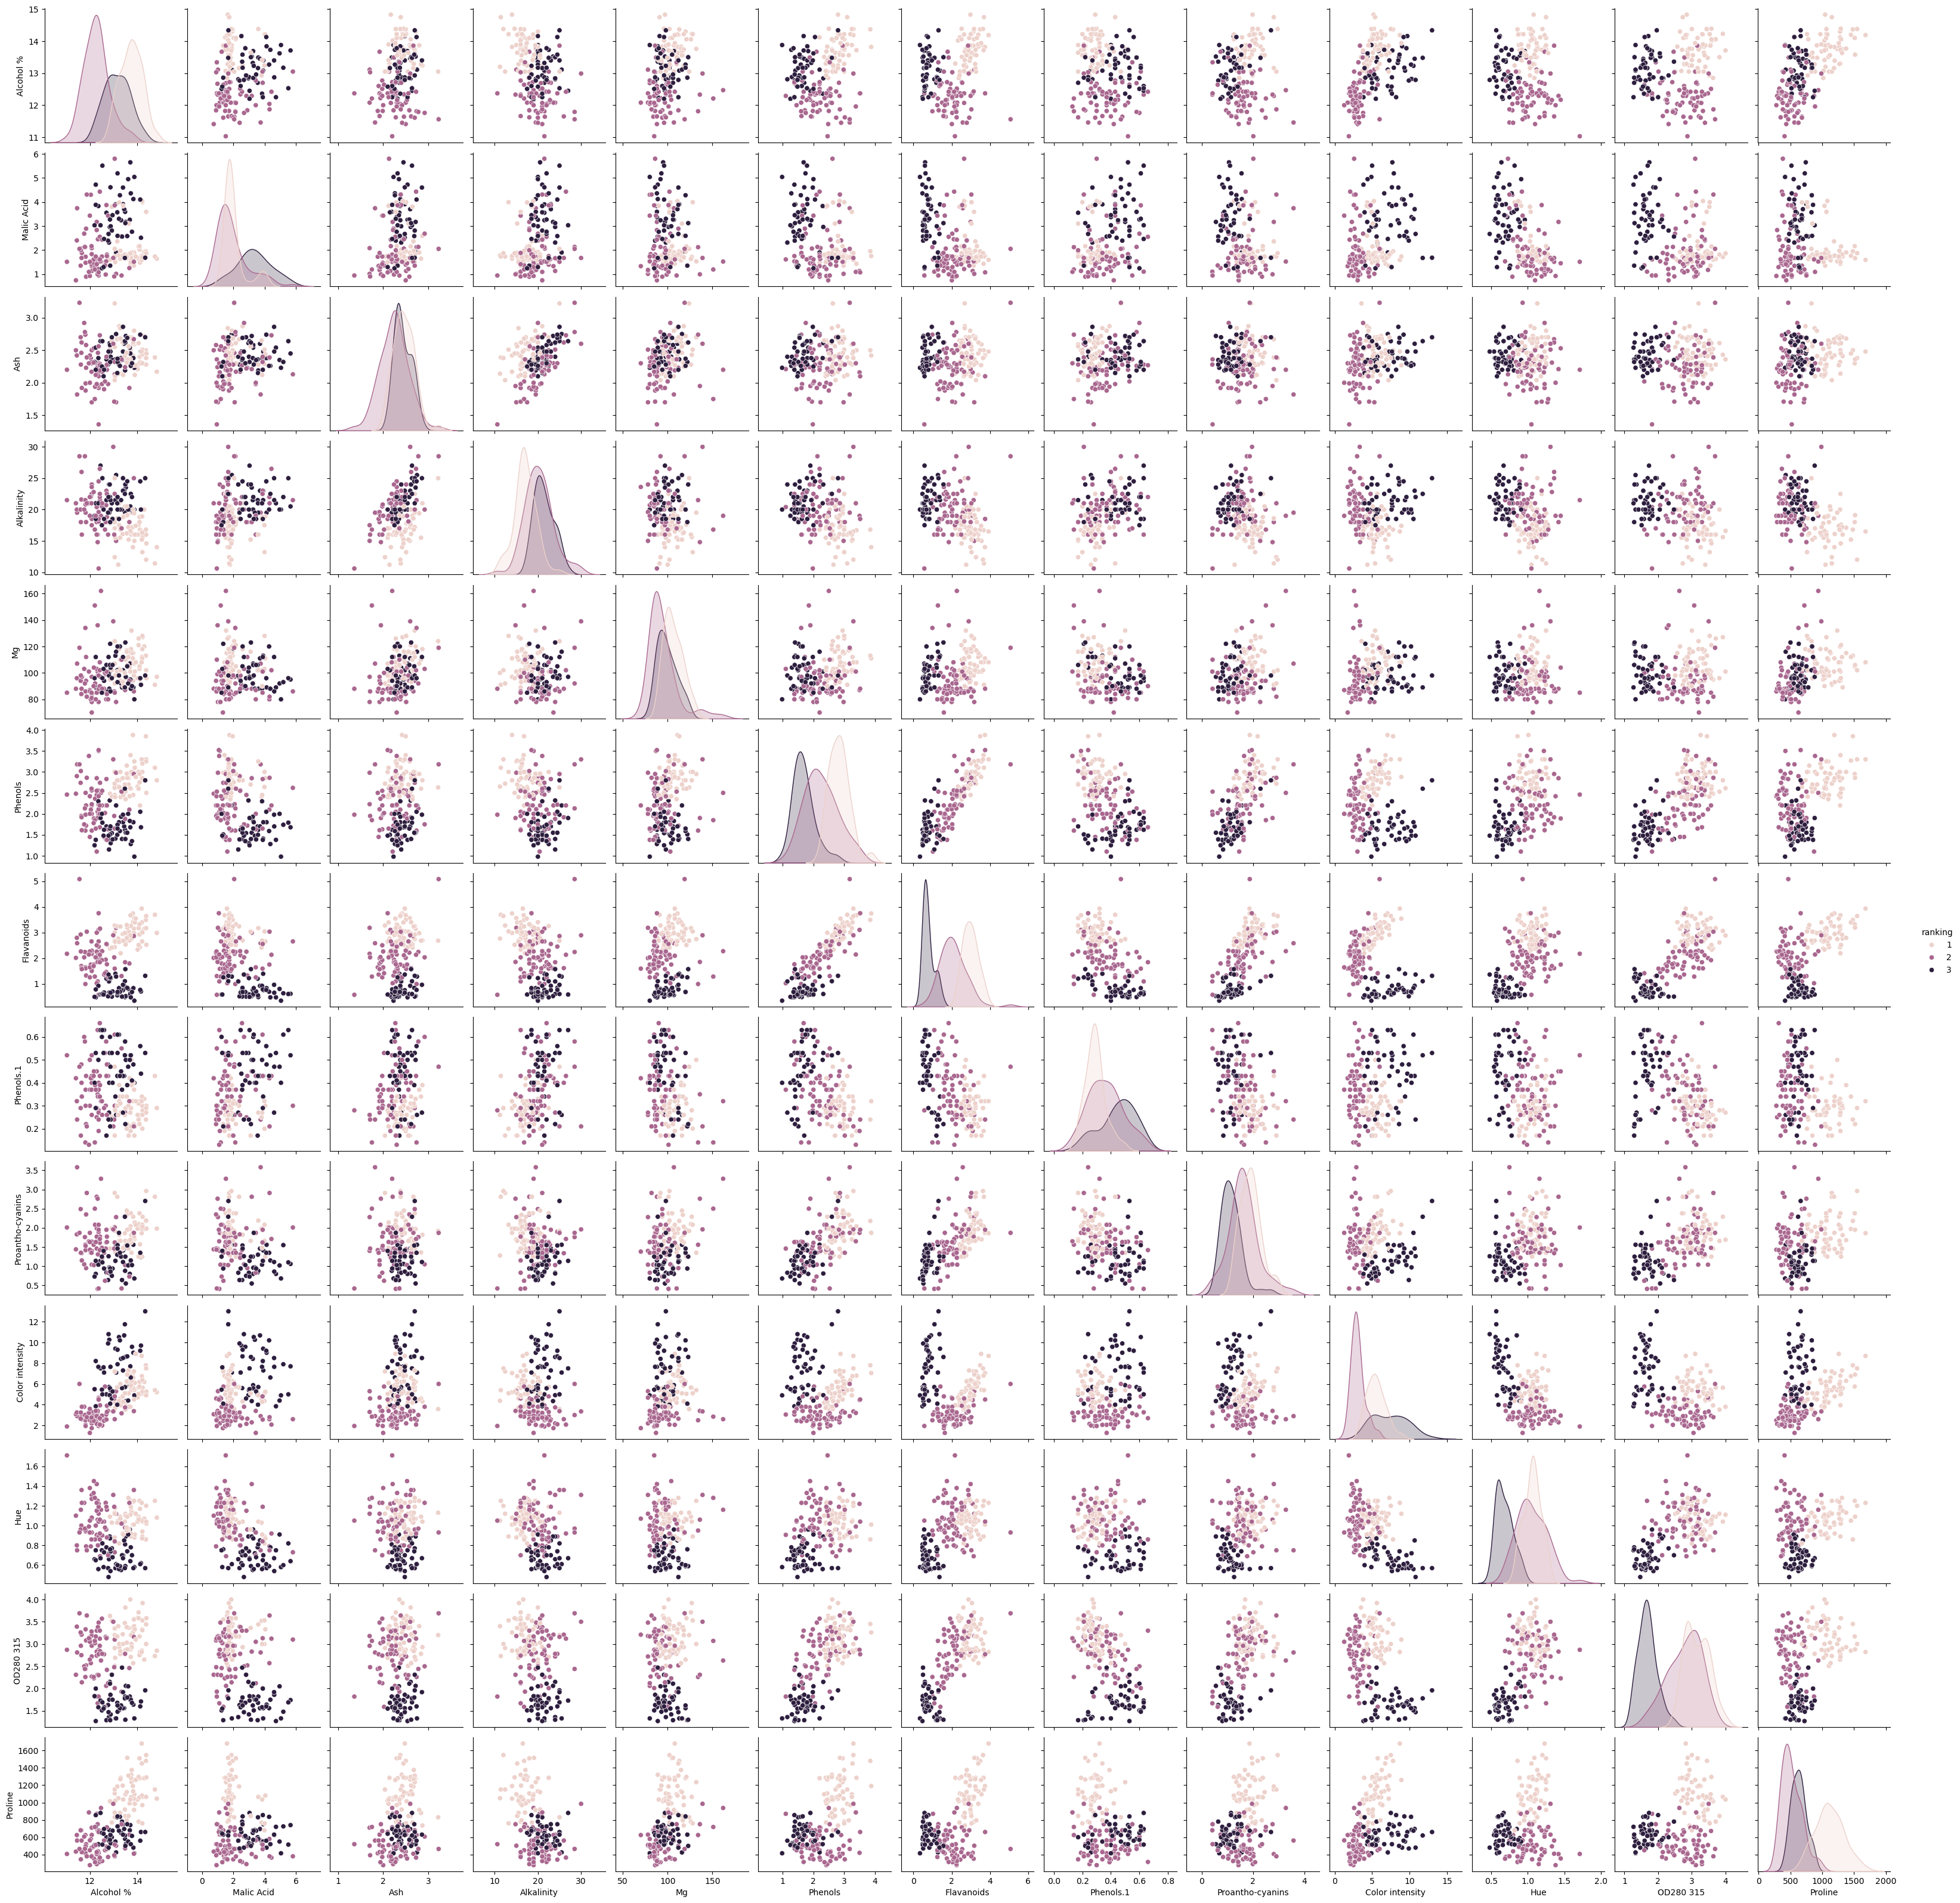

In [9]:
import seaborn as sns
# Pair Plot
newdf = wines_df.drop(['Start assignment'], axis=1)
sns.pairplot(data=newdf, hue='ranking')

<Axes: >

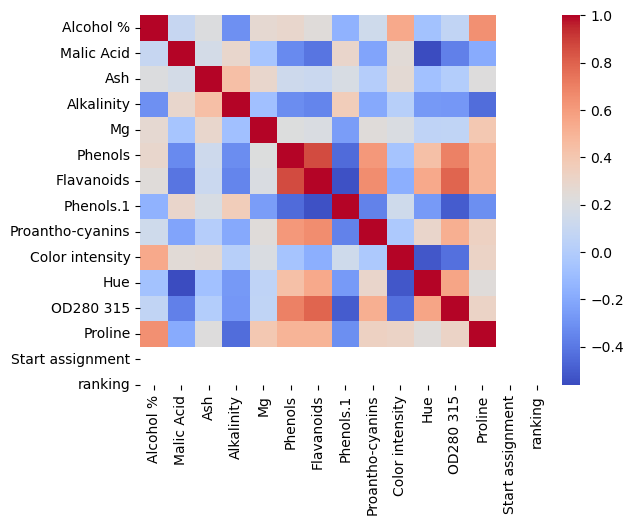

In [10]:
# use numpy to calculate corr coef
corrmat = np.corrcoef(X.T)
# seaborn vis
sns.heatmap(corrmat, cmap='coolwarm', xticklabels=wines_df.columns, yticklabels=wines_df.columns, annot=False)

In [11]:
# Instantiate the classifier and train it with the wine dataset
nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(X, y)
print("Classes:", nb_classifier.cls)
print("Features:", len(nb_classifier.cls_stats[0][0]))
print("Class Statistics (first class):", nb_classifier.cls_stats[0])  # Show the stats for the first class

Classes: [1 2 3]
Features: 13
Class Statistics (first class): (array([1.37447458e+01, 2.01067797e+00, 2.45559322e+00, 1.70372881e+01,
       1.06338983e+02, 2.84016949e+00, 2.98237288e+00, 2.90000000e-01,
       1.89932203e+00, 5.52830508e+00, 1.06203390e+00, 3.15779661e+00,
       1.11571186e+03]), array([4.58192306e-01, 6.82688763e-01, 2.25232619e-01, 2.52465123e+00,
       1.04095949e+01, 3.36076522e-01, 3.94110623e-01, 6.94530691e-02,
       4.08601851e-01, 1.22803157e+00, 1.15491282e-01, 3.54037572e-01,
       2.19635449e+02]))


In [12]:
# Now calculate the probability of a wine having an Alcohol % of 13 for cultivar 1
# For this, we find the mean and standard deviation of Alcohol % for cultivar 1
mean_c1_ap, std_c1_ap = nb_classifier.cls_stats[0][0][0], nb_classifier.cls_stats[0][1][0]

# Using the gaussian function to calculate the probability
alcohol_percentage = 13
prob_ap_c1 = NaiveBayesClassifier.gaussian(np.array([[alcohol_percentage]]), mean_c1_ap, std_c1_ap)

prob_ap_c1[0][0]  # This will give us the probability of having an Alcohol % of 13 for cultivar 1

0.23236757865410512

#### Answer: The probability of a wine having an Alcohol % of 13, given that it belongs to cultivar 1, is approximately 0.2323 according to the Gaussian probability distribution function.
* The Gaussian distribution is selected for the Naive Bayes classifier because it effectively models continuous data, is mathematically tractable, and aligns with the Central Limit Theorem, which suggests that many natural processes exhibit a normal distribution. It requires only two parameters (mean and standard deviation) for its definition, simplifying the calculation process. Even when the actual data distribution slightly deviates from normality, the Gaussian distribution often yields robust classification results.

## (b)

Preprocess data:
+ Select relevant descriptors (columns other than "Start assignment" and "ranking"). Should get *178 datapoints and 13 features*.
+ Normalize the data with `StandardScaler` in sklearn.
+ The labels are in the "ranking" column.

*For debugging*: The accuracy could reach over 95\%.

In [13]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [14]:
def calculate_accuracy(model, X, y):
    y_pred = model.predict(X)
    acc = np.sum(y_pred == y) / len(y)
    return acc

def KFoldNaiveBayes(k, X, y):
    """
    K-Fold Cross Validation for Naive Bayes Classifier
    
    Parameters
    ---------
    k: int
        Number of folds
    X: numpy.ndarray
        Input data, shape (n_samples, n_features)
    y: numpy.ndarray
        Class labels, shape (n_samples)
    """
    kf = KFold(n_splits=k, shuffle=True)
    train_acc_all = []
    test_acc_all = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model = NaiveBayesClassifier()
        model.fit(X_train, y_train)
        
        # Report prediction accuracy for this fold
        # use the calculate_accuracy() function
        train_acc = calculate_accuracy(model, X_train, y_train)
        train_acc_all.append(train_acc)
        test_acc = calculate_accuracy(model, X_test, y_test)
        test_acc_all.append(test_acc)
        print("Train accuracy:", train_acc)
        print("Test accuracy:", test_acc)
    
    # report mean & std for the training/testing accuracy
    print("\nFinal results:")
    print(f"Training accuracy: {np.mean(train_acc_all)}+/-{np.std(train_acc_all)}")
    print(f"Testing  accuracy: {np.mean(test_acc_all)}+/-{np.std(test_acc_all)}")

In [15]:
# Normalizing the dataset before applying KFold cross-validation
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Apply the K-Fold cross-validation with k=3
KFoldNaiveBayes(3, X_normalized, y)

Train accuracy: 0.9830508474576272
Test accuracy: 1.0
Train accuracy: 0.9915966386554622
Test accuracy: 0.9491525423728814
Train accuracy: 0.9915966386554622
Test accuracy: 0.9491525423728814

Final results:
Training accuracy: 0.9887480415895172+/-0.0040285246043956485
Testing  accuracy: 0.9661016949152543+/-0.02396972139615414


# Question 3

## (a)

In [16]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split

In [17]:
# Define your model here
class SimpleNN(nn.Module):
    def __init__(self, input_features, output_features):
        super(SimpleNN, self).__init__()
        # Define the output layer with no hidden layer in between
        self.linear = nn.Linear(input_features, output_features)
        # Softmax activation function applied to the output layer
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x, apply_softmax=True):
        x = self.linear(x)
        if apply_softmax:
            x = self.softmax(x)
        return x

In [18]:
# Initialize the model
model = SimpleNN(13, 3)

# Now we will pass the normalized data through the model
# Convert the normalized features to a tensor
X_3 = torch.tensor(X_normalized, dtype=torch.float32)
y_3 = torch.tensor(y - 1)

# Pass the data through the network once without backpropagation
with torch.no_grad(): # Ensure that no gradients are computed
    # Get the raw output from the model without applying softmax
    logits = model(X_3, apply_softmax=False)
    print("Output without softmax:\n", pd.DataFrame(logits))

    # Get the probabilities by applying softmax
    probabilities = model(X_3, apply_softmax=True)
    print("\nOutput with softmax:\n", pd.DataFrame(probabilities))

Output without softmax:
             0         1         2
0    0.021275  0.698745  0.294596
1   -0.053296 -0.622730  0.505994
2   -0.182304  0.781647  0.088194
3   -0.586020  0.302525 -0.343859
4   -0.525492  0.143877 -0.372344
..        ...       ...       ...
173  0.713619 -1.534094  0.926650
174  0.596156 -0.961977  0.979488
175  0.134677 -0.792749  0.910113
176  0.123913 -1.699955  1.214125
177 -0.399980  0.115949 -0.094279

[178 rows x 3 columns]

Output with softmax:
             0         1         2
0    0.233470  0.459676  0.306854
1    0.301634  0.170678  0.527688
2    0.202731  0.531567  0.265702
3    0.212513  0.516745  0.270742
4    0.242807  0.474203  0.282991
..        ...       ...       ...
173  0.426792  0.045087  0.528122
174  0.373456  0.078623  0.547921
175  0.280339  0.110894  0.608767
176  0.241762  0.039020  0.719218
177  0.247968  0.415395  0.336636

[178 rows x 3 columns]


### Description: 
* The **logits (output without softmax)** will show the raw output scores from the network, and the **softmax probabilities (output without softmax)** will show the normalized scores that sum to 1, which can be interpreted as probabilities for each class.
* The softmax function converts the logits to probabilities by exponentiating each logit and then normalizing them so that they sum to one. **This is useful because it allows us to interpret the output of the model as probabilities**, which can be helpful for tasks like classification where we want to assign the most likely label to each input.

## (b)

*For debugging*: The accuracy could reach over 95\% if the hyperparamters are tuned properly.

In [19]:
def train_and_val(model, X_train, y_train, epochs, draw_curve=True):
    """
    Further split the data into acutal train and validation subsets.
    """
    # Define your loss function, optimizer
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
    
    # Split data into actual train and validation subsets    
    X_train_in, X_val, y_train_in, y_val = train_test_split(X_train, y_train, test_size=0.2)
    
    val_losses = []
    lowest_val_loss = np.inf
    
    weights = {}
    for i in range(epochs):
        # Compute the loss and do back-propagation
        y_train_pred = model(X_train_in)
        loss = loss_func(y_train_pred, y_train_in)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Compute validation loss and keep track of the lowest val loss
        with torch.no_grad():
            val_loss = loss_func(model(X_val), y_val) 
        if val_loss < lowest_val_loss:
            lowest_val_loss = val_loss
            weights = model.state_dict() # Save the best model weights
        val_losses.append(val_loss) # Convert loss to a Python number
        
    # The final number of epochs is when the minimum error in validation set occurs    
    final_epochs = np.argmin(val_losses)
    print("Number of epochs with lowest validation:", final_epochs)
    print(f"Validation loss: {np.min(val_losses)}")
    # Recover the model weights
    model.load_state_dict(weights)

    if draw_curve:
        fig, ax = plt.subplots(1, 1, figsize=(5, 4), constrained_layout=True)
        ax.plot(np.arange(epochs), val_losses, label='Validation loss', color='darkgreen')
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Loss')
        ax.legend()
    
    return model


def calculate_accuracy_nn(model, X, y):
    with torch.no_grad():
        y_pred = torch.argmax(model(X), axis=1)
        acc = torch.sum(y_pred == y) / len(y)
    return acc.detach().numpy()


def KFoldNN(k, X, y, epochs=500):
    """
    K-Fold Validation for Neural Network
    
    Parameters
    ---------
    k: int
        Number of folds
    X: numpy.ndarray
        Input data, shape (n_samples, n_features)
    y: numpy.ndarray
        Class labels, shape (n_samples)
    epochs: int
        Number of epochs during training
    """
    # K-Fold
    kf = KFold(n_splits=k, shuffle=True)
    train_acc_all = []
    test_acc_all = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # further do a train/valid split on X_train
        model = train_and_val(SimpleNN(13, 3), X_train, y_train, epochs, draw_curve=True)
        
        # Report prediction accuracy for this fold
        # use calculate_accuracy_nn() function
        train_acc = calculate_accuracy_nn(model, X_train, y_train)
        train_acc_all.append(train_acc)
        test_acc = calculate_accuracy_nn(model, X_test, y_test)
        test_acc_all.append(test_acc)
        print("Train accuracy:", train_acc)
        print("Test accuracy:", test_acc)
    
    # report mean & std for the training/testing accuracy
    print("\nFinal results:")
    print(f"Training accuracy: {np.mean(train_acc_all)}+/-{np.std(train_acc_all)}")
    print(f"Testing  accuracy: {np.mean(test_acc_all)}+/-{np.std(test_acc_all)}")

Number of epochs with lowest validation: 499
Validation loss: 0.5890628695487976
Train accuracy: 0.9915254
Test accuracy: 0.95
Number of epochs with lowest validation: 499
Validation loss: 0.5680376887321472
Train accuracy: 1.0
Test accuracy: 0.91525424
Number of epochs with lowest validation: 499
Validation loss: 0.5561280846595764
Train accuracy: 1.0
Test accuracy: 0.9830508

Final results:
Training accuracy: 0.9971751570701599+/-0.003994958940893412
Testing  accuracy: 0.9494349956512451+/-0.02768072485923767


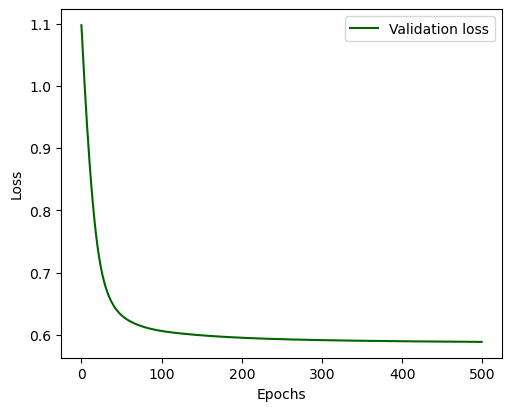

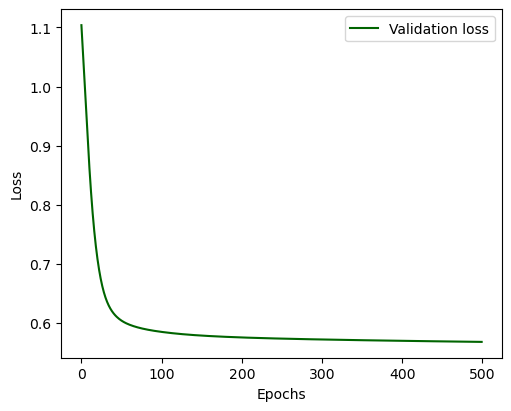

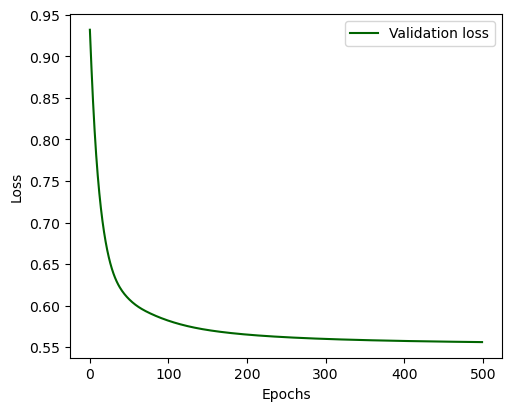

In [20]:
KFoldNN(3, X_3, y_3)

### The prediction relative to problem 2: 
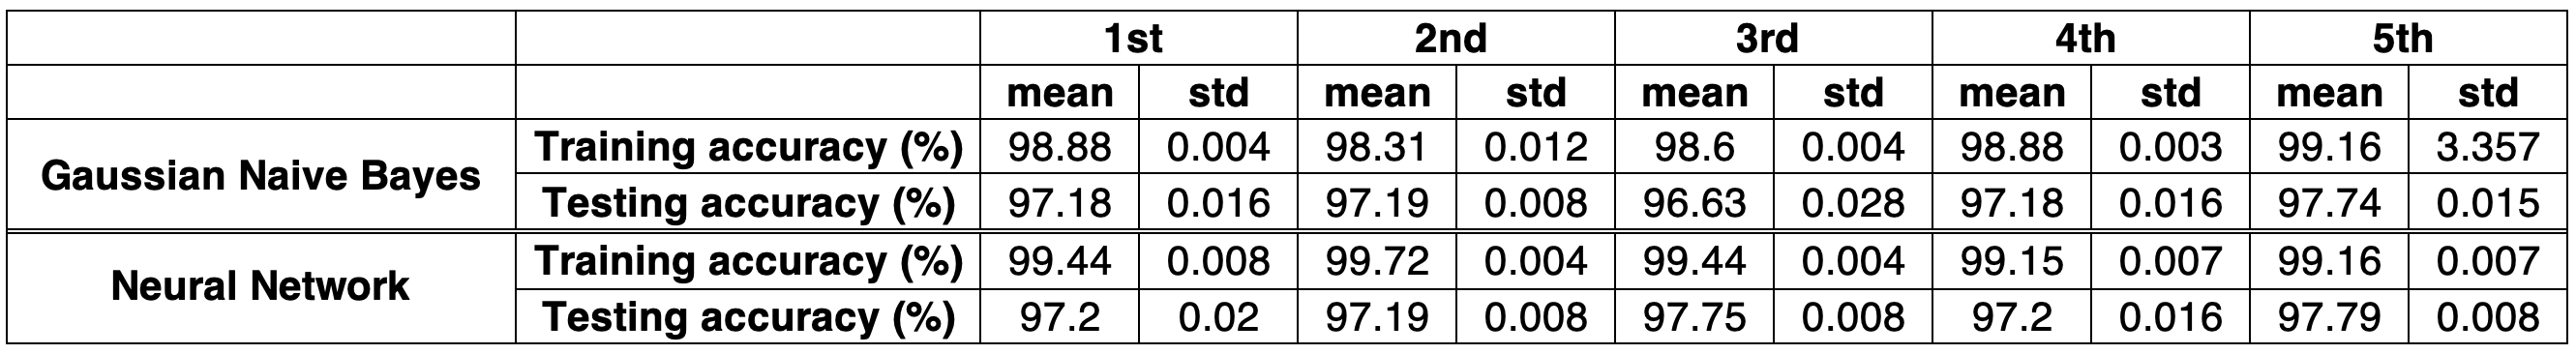
* **Gaussian Naive Bayes:**
<br>Training Accuracy: ~98.31 - 99.16%
<br>Testing Accuracy: ~96.63 - 97.74%
* **Neural Network with Softmax and Cross Entropy Loss:**
<br>Training Accuracy: ~99.15 - 99.72%
<br>Testing Accuracy: ~97.19 - 97.79%
### Description: 
* The neural network performs exceptionally well on the training set, indicating that it can learn the training data almost perfectly. However, it the same testing accuracy with the Gaussian Naive Bayes classifier. The higher training accuracy suggests that the neural network may be overfitting the training data, resulting in less generalization to unseen data.